<a href="https://colab.research.google.com/github/Leshma2210/Codeclause/blob/main/CodeClause_Customer_Segmentation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Customers.csv')

In [4]:
df.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [6]:
X = df.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

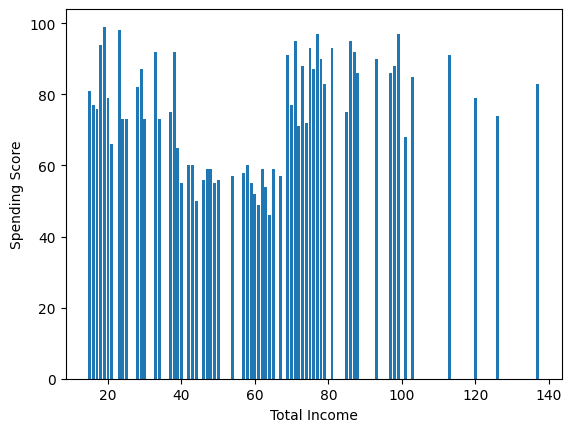

In [7]:
plt.bar(X[...,0],X[...,1])
plt.xlabel('Total Income')
plt.ylabel('Spending Score')
plt.show()

In [8]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

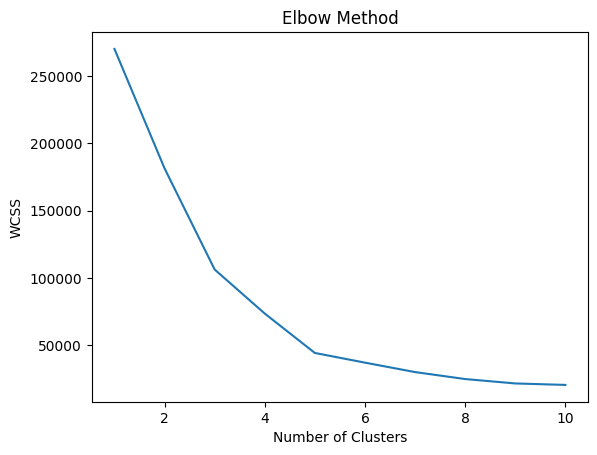

In [9]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)
Y_kmeans = kmeans.fit_predict(X)
Y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

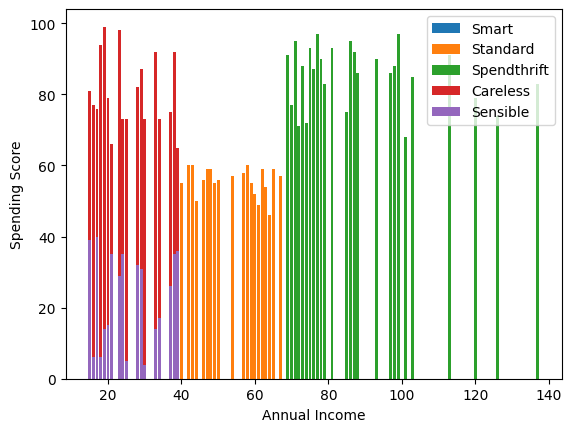

In [11]:
plt.bar(X[Y_kmeans==0,0],X[Y_kmeans==0,1],label='Smart')
plt.bar(X[Y_kmeans==1,0],X[Y_kmeans==1,1],label='Standard')
plt.bar(X[Y_kmeans==2,0],X[Y_kmeans==2,1],label='Spendthrift')
plt.bar(X[Y_kmeans==3,0],X[Y_kmeans==3,1],label='Careless')
plt.bar(X[Y_kmeans==4,0],X[Y_kmeans==4,1],label='Sensible')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [12]:
X = df.iloc[:,[1,2]].values
X

array([['Male', 19],
       ['Male', 21],
       ['Female', 20],
       ['Female', 23],
       ['Female', 31],
       ['Female', 22],
       ['Female', 35],
       ['Female', 23],
       ['Male', 64],
       ['Female', 30],
       ['Male', 67],
       ['Female', 35],
       ['Female', 58],
       ['Female', 24],
       ['Male', 37],
       ['Male', 22],
       ['Female', 35],
       ['Male', 20],
       ['Male', 52],
       ['Female', 35],
       ['Male', 35],
       ['Male', 25],
       ['Female', 46],
       ['Male', 31],
       ['Female', 54],
       ['Male', 29],
       ['Female', 45],
       ['Male', 35],
       ['Female', 40],
       ['Female', 23],
       ['Male', 60],
       ['Female', 21],
       ['Male', 53],
       ['Male', 18],
       ['Female', 49],
       ['Female', 21],
       ['Female', 42],
       ['Female', 30],
       ['Female', 36],
       ['Female', 20],
       ['Female', 65],
       ['Male', 24],
       ['Male', 48],
       ['Female', 31],
       ['Female', 49],
 

In [14]:
counts = df.groupby(['Age','Genre']).count()
print (counts)

            CustomerID  Annual_Income_(k$)  Spending_Score
Age Genre                                                 
18  Female           1                   1               1
    Male             3                   3               3
19  Female           2                   2               2
    Male             6                   6               6
20  Female           2                   2               2
...                ...                 ...             ...
67  Male             3                   3               3
68  Female           2                   2               2
    Male             1                   1               1
69  Male             1                   1               1
70  Male             2                   2               2

[87 rows x 3 columns]


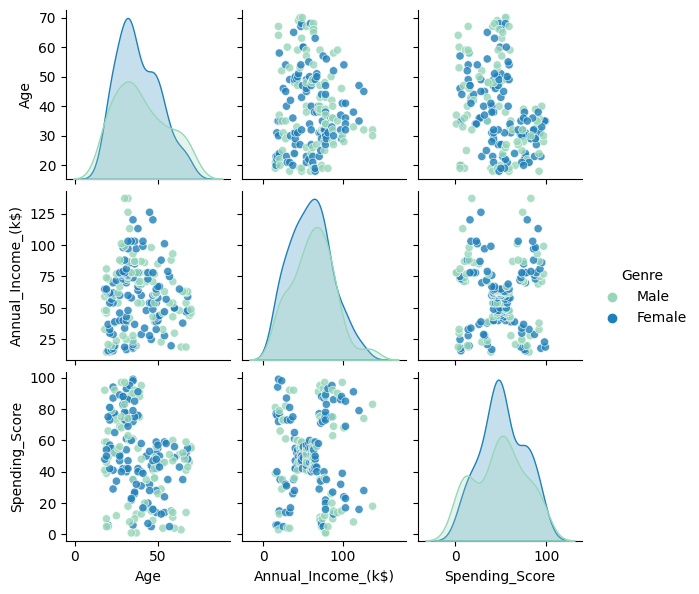

In [25]:
sns.pairplot( df,x_vars = ["Age", "Annual_Income_(k$)", "Spending_Score"],
               y_vars = ["Age", "Annual_Income_(k$)", "Spending_Score"],
               hue = "Genre",
               kind= "scatter",
               palette = "YlGnBu",
               height = 2,
               plot_kws={"s": 35, "alpha": 0.8});